# Soluzione del problema ai minimi quadrati con diverse fattorizzazioni

Vogliamo trovare l'x che minimizzi il problema dei minimi quadrati: \
$\underset{x}{min} ||Ax - b||_2^2$ \
$A \in \mathbb{R}^{mxn}$ sarà la nostra matrice dei coefficienti, quindi avremo m numero dei campioni e n numero delle features. Alla nostra matrice dei dati aggiungiamo una colonna di 1 all'inizio rendendola quindi $A \in \mathbb{R}^{mx(n+1)}$. $b \in \mathbb{R}^{n}$ invece rappresenta il termine noto.

Carichiamo quindi il dataset wine e mostriamolo a schermo. Il dataset è già suddiviso in A e b.

In [1]:
import numpy as np
from sklearn import datasets
import sympy as sym

A, b = datasets.load_wine(return_X_y=True)
samples = A.shape[0]
features = A.shape[1]
display(sym.Matrix(A[1:10,:]))

Matrix([
[ 13.2, 1.78, 2.14, 11.2, 100.0, 2.65, 2.76, 0.26, 1.28, 4.38, 1.05,  3.4, 1050.0],
[13.16, 2.36, 2.67, 18.6, 101.0,  2.8, 3.24,  0.3, 2.81, 5.68, 1.03, 3.17, 1185.0],
[14.37, 1.95,  2.5, 16.8, 113.0, 3.85, 3.49, 0.24, 2.18,  7.8, 0.86, 3.45, 1480.0],
[13.24, 2.59, 2.87, 21.0, 118.0,  2.8, 2.69, 0.39, 1.82, 4.32, 1.04, 2.93,  735.0],
[ 14.2, 1.76, 2.45, 15.2, 112.0, 3.27, 3.39, 0.34, 1.97, 6.75, 1.05, 2.85, 1450.0],
[14.39, 1.87, 2.45, 14.6,  96.0,  2.5, 2.52,  0.3, 1.98, 5.25, 1.02, 3.58, 1290.0],
[14.06, 2.15, 2.61, 17.6, 121.0,  2.6, 2.51, 0.31, 1.25, 5.05, 1.06, 3.58, 1295.0],
[14.83, 1.64, 2.17, 14.0,  97.0,  2.8, 2.98, 0.29, 1.98,  5.2, 1.08, 2.85, 1045.0],
[13.86, 1.35, 2.27, 16.0,  98.0, 2.98, 3.15, 0.22, 1.85, 7.22, 1.01, 3.55, 1045.0]])

All'interno di un dataset le features saranno, a meno di casi particolari, quasi sempre tutte scorrelate. Ogni feature descrive un aspetto del problema separato ed è verosimile assumere che esse non abbiano nulla in comune tra di loro. Per sicurezza controlliamo il rango della matrice.

In [2]:
print(f"Rango della matrice: {np.linalg.matrix_rank(A)}")
print(f"Numero di fetures: {features}")

Rango della matrice: 13
Numero di fetures: 13


Ogni feature di questo dataset descrive un qualcosa di diverso, le unità di misura sono fuori scala e non è difficile pensare che questo possa portare a dare più importanza a certe features piuttosto che altre. Per ovviare a questo problema portiamo due approcci differenti. Il primo è di normalizzare la matrice ed il secondo è di standardizzarla. Siccome effetturare la standardizzazione è un'assunzione forte e non scontata, porto entrambi gli esempi e vedremo come i risultati cambieranno in entrambi i casi.

In [3]:
from sklearn.preprocessing import StandardScaler

A_std = StandardScaler().fit_transform(A)
display(sym.Matrix(np.around(A_std[1:10, :], 2)))

Matrix([
[0.25,  -0.5, -0.83, -2.49,  0.02, 0.57, 0.73, -0.82, -0.54, -0.29,  0.41, 1.11,  0.97],
[ 0.2,  0.02,  1.11, -0.27,  0.09, 0.81, 1.22,  -0.5,  2.14,  0.27,  0.32, 0.79,   1.4],
[1.69, -0.35,  0.49, -0.81,  0.93, 2.49, 1.47, -0.98,  1.03,  1.19, -0.43, 1.18,  2.33],
[ 0.3,  0.23,  1.84,  0.45,  1.28, 0.81, 0.66,  0.23,   0.4, -0.32,  0.36, 0.45, -0.04],
[1.48, -0.52,  0.31, -1.29,  0.86, 1.56, 1.37, -0.18,  0.66,  0.73,  0.41, 0.34,  2.24],
[1.72, -0.42,  0.31, -1.47, -0.26, 0.33, 0.49,  -0.5,  0.68,  0.08,  0.27, 1.37,  1.73],
[1.31, -0.17,  0.89, -0.57,  1.49, 0.49, 0.48, -0.42,  -0.6,     0,  0.45, 1.37,  1.75],
[2.26, -0.63, -0.72, -1.65, -0.19, 0.81, 0.95, -0.58,  0.68,  0.06,  0.54, 0.34,  0.95],
[1.06, -0.89, -0.35, -1.05, -0.12,  1.1, 1.13, -1.14,  0.45,  0.94,  0.23, 1.33,  0.95]])

In [4]:
from sklearn.preprocessing import MinMaxScaler

A_mm = MinMaxScaler((0, 1)).fit_transform(A)
display(sym.Matrix(np.around(A_mm[1:10, :], 2)))

Matrix([
[0.57, 0.21, 0.42, 0.03, 0.33, 0.58, 0.51, 0.25, 0.27, 0.26, 0.46, 0.78, 0.55],
[0.56, 0.32,  0.7, 0.41, 0.34, 0.63, 0.61, 0.32, 0.76, 0.38, 0.45,  0.7, 0.65],
[0.88, 0.24, 0.61, 0.32, 0.47, 0.99, 0.66, 0.21, 0.56, 0.56, 0.31,  0.8, 0.86],
[0.58, 0.37, 0.81, 0.54, 0.52, 0.63,  0.5, 0.49, 0.44, 0.26, 0.46, 0.61, 0.33],
[0.83,  0.2, 0.58, 0.24, 0.46, 0.79, 0.64,  0.4, 0.49, 0.47, 0.46, 0.58, 0.84],
[0.88, 0.22, 0.58, 0.21, 0.28, 0.52, 0.46, 0.32,  0.5, 0.34, 0.44, 0.85, 0.72],
[ 0.8, 0.28, 0.67, 0.36, 0.55, 0.56, 0.46, 0.34, 0.26, 0.32, 0.47, 0.85, 0.73],
[ 1.0, 0.18, 0.43, 0.18, 0.29, 0.63, 0.56,  0.3,  0.5, 0.33, 0.49, 0.58, 0.55],
[0.74, 0.12, 0.49, 0.28,  0.3, 0.69, 0.59, 0.17, 0.45, 0.51, 0.43, 0.84, 0.55]])

Inseriamo ora il vettore di soli 1 come prima colonna della matrice dei dati.

In [5]:
A_std = np.insert(A_std, 0, np.ones(samples), axis=1)
A_mm = np.insert(A_mm, 0, np.ones(samples), axis=1)

Andiamo a suddividere i dati in train e test, utilizzando come suddivisione 70% / 30%.

In [6]:
from sklearn.model_selection import train_test_split

A_std_train, A_std_test, b_std_train, b_std_test = train_test_split(A_std,
                                                                    b,
                                                                    test_size=0.3,
                                                                    random_state=42)

A_mm_train, A_mm_test, b_mm_train, b_mm_test = train_test_split(A_mm,
                                                                b,
                                                                test_size=0.3,
                                                                random_state=42)

## Utility varie per la valutazione dei modelli

Definisco delle liste per una visualizzazione finale dei risultati e una funzione che eseguirà il modello con dei dati randomici n volte, calcolando il tempo medio di esecuzione.

In [7]:
import timeit
import scipy.linalg as las
from sklearn.metrics import mean_squared_error, accuracy_score

model_names = ['Norm. Eq.', 'QR', 'PQR', 'SVD', 'tSVD', 'SciPy']
acc_list_std = []
cond_list_std = []
time_list_std = []
acc_list_mm = []
cond_list_mm = []
time_list_mm = []
N_ITER = 10000

def time_evaluation(lambda_fn, n_iter):
    return timeit.timeit(lambda_fn, number=n_iter)

Andiamo ora dunque a definire i vari modelli per la soluzione del problema dei minimi quadrati. Per la valutazione utilizzeremo come metriche l'errore quadratico medio, il numero di condizione della matrice, l'accuracy ed il tempo di esecuzione medio. Calcoleremo queste metriche su tutti gli algoritmi per entrambe le matrici (sia quella standardizzata, che quella normalizzata) e alla fine mostreremo dei grafici comparativi.

## Soluzione dei minimi quadrati con equazioni normali

Dato il sistema lineare $Ax = b$, possiamo passare alle equazioni normali moltiplicando per la trasposta, ottenendo: $A^TAx = A^Tb$. Se la matrice $A^TA$ è non singolare allora possiamo calcolare la soluzione approssimata come: $\hat{x} = (A^TA)^{-1}A^Tb$. Il calcolo dell'inversa però è pesante dal punto di vista computazionale, quindi quello che faremo è risolvere solo il sistema. Risolvere il problema dei minimi quadrati con le equazioni normali aumenta però il condizionamento del problema a $K(A^2)$.

In [8]:
def lsqr_n_eq(A, b):
    x = las.solve(A.T @ A, A.T @ b)
    return x

### Matrice standardizzata

In [9]:
x = lsqr_n_eq(A_std_train, b_std_train)
b_pred = A_std_test @ x

print(f"MSE:\t\t {mean_squared_error(b_std_test, b_pred): 2.3f}")

cond = np.linalg.cond(A_std_train.T @ A_std_train)
cond_list_std.append(cond)
print(f"Condition:\t {cond: 2.3f}")

acc = accuracy_score(b_std_test, np.round(b_pred))* 100
acc_list_std.append(acc)
print(f"Accuracy:\t {acc: 2.2f}%")

time = time_evaluation(lambda : lsqr_n_eq(A_std_train, b_std_train), N_ITER)
time_list_std.append(time)
print(f"Average Time:\t {time: 2.2f} ms")

MSE:		  0.060
Condition:	  48.048
Accuracy:	  94.44%
Average Time:	  1.27 ms


### Matrice normalizzata

In [10]:
x = lsqr_n_eq(A_mm_train, b_mm_train)
b_pred = A_mm_test @ x

print(f"MSE:\t\t {mean_squared_error(b_mm_test, b_pred): 2.3f}")

cond = np.linalg.cond(A_mm_train.T @ A_mm_train)
cond_list_mm.append(cond)
print(f"Condition:\t {cond: 2.3f}")

acc = accuracy_score(b_mm_test, np.round(b_pred))* 100
acc_list_mm.append(acc)
print(f"Accuracy:\t {acc: 2.2f}%")

time = time_evaluation(lambda : lsqr_n_eq(A_mm_train, b_mm_train), N_ITER)
time_list_mm.append(time)
print(f"Average Time:\t {time: 2.2f} ms")

MSE:		  0.060
Condition:	  792.662
Accuracy:	  94.44%
Average Time:	  1.13 ms


## Soluzione dei minimi quadrati con fattorizzazione QR

Fattorizziamo la matrice A come due matrici QR (A = QR). Il risultato approssimato che otteniamo è: $\hat{x} = R^{-1}Q_1^Tb$. Possiamo suddividere la matrice Q in due sottomatrici, la prima che chiamiamo $Q_1$ è composta dalle prime k colonne, dove k = rank(A), di Q. $Q_2$ è composta dalle restanti colonne di Q. Per il problema dei minimi quadrati è necessario solo calcolare le prima k colonne della matrice Q, quindi utilizziamo la modalità economica per il calcolo della fattorizzazione. Dato che il calcolo della matrice inversa è molto più pesante a livello computazionale, rimodelliamo il problema in: $R\hat{x} = Q_1^Tb$ e risolviamo il sistema lineare così ottenuto per trovare $\hat{x}$.

In [11]:
def lsqr_qr(A, b):
    Q, R = las.qr(A, overwrite_a=False, mode="economic")
    x = las.solve(R, Q.T @ b)
    return Q, R, x

### Matrice standardizzata

In [12]:
Q, R, x = lsqr_qr(A_std_train, b_std_train)
b_pred = A_std_test @ x

print(f"MSE:\t\t {mean_squared_error(b_std_test, b_pred): 2.3f}")

cond = np.linalg.cond(R)
cond_list_std.append(cond)
print(f"Condition:\t {cond: 2.3f}")

acc = accuracy_score(b_std_test, np.round(b_pred))* 100
acc_list_std.append(acc)
print(f"Accuracy:\t {acc: 2.2f}%")

time = time_evaluation(lambda : lsqr_qr(A_std_train, b_std_train), N_ITER)
time_list_std.append(time)
print(f"Average Time:\t {time: 2.2f} ms")

MSE:		  0.060
Condition:	  6.932
Accuracy:	  94.44%
Average Time:	  3.78 ms


### Matrice normalizzata

In [13]:
Q, R, x = lsqr_qr(A_mm_train, b_mm_train)
b_pred = A_mm_test @ x

print(f"MSE:\t\t {mean_squared_error(b_mm_test, b_pred): 2.3f}")

cond = np.linalg.cond(R)
cond_list_mm.append(cond)
print(f"Condition:\t {cond: 2.3f}")

acc = accuracy_score(b_mm_test, np.round(b_pred))* 100
acc_list_mm.append(acc)
print(f"Accuracy:\t {acc: 2.2f}%")

time = time_evaluation(lambda : lsqr_qr(A_mm_train, b_mm_train), N_ITER)
time_list_mm.append(time)
print(f"Average Time:\t {time: 2.2f} ms")

MSE:		  0.060
Condition:	  28.154
Accuracy:	  94.44%
Average Time:	  3.58 ms


## Soluzione dei minimi quadrati con fattorizzazione QR con pivoting

In modo analogo alla soluzione con la fattorizzazione QR, andiamo a risolvere il problema con l'aggiunta del pivoting. In questo caso quello che andiamo a fare e suddividere la matrice in $AP = QR$, facendo in modo che i valori in posizione pivotale di R siano ordinati in ordine decrescente. Ci basterà quindi risolvere il problema dei minimi quadrati come abbiamo fatto con la QR classica e poi riordinare il risultato tramite le permutazioni di P.

In [14]:
def lsqr_pqr(A,b):
    Q, R, P = las.qr(A, overwrite_a=False, mode="economic", pivoting=True)
    x = las.solve(R, Q.T @ b)
    return Q, R, P, x

### Matrice standardizzata

In [15]:
Q, R, P, x = lsqr_pqr(A_std_train, b_std_train)
b_pred = A_std_test[:, P] @ x

print(f"MSE:\t\t {mean_squared_error(b_std_test, b_pred): 2.3f}")

cond = np.linalg.cond(R)
cond_list_std.append(cond)
print(f"Condition:\t {cond: 2.3f}")

acc = accuracy_score(b_std_test, np.round(b_pred)) * 100
acc_list_std.append(acc)
print(f"Accuracy:\t {acc: 2.2f}%")

time = time_evaluation(lambda : lsqr_pqr(A_std_train, b_std_train), N_ITER)
time_list_std.append(time)
print(f"Average Time:\t {time: 2.2f} ms")

MSE:		  0.060
Condition:	  6.932
Accuracy:	  94.44%
Average Time:	  2.50 ms


### Matrice normalizzata

In [16]:
Q, R, P, x = lsqr_pqr(A_mm_train, b_mm_train)
b_pred = A_mm_test[:, P] @ x

print(f"MSE:\t\t {mean_squared_error(b_mm_test, b_pred): 2.3f}")

cond = np.linalg.cond(R)
cond_list_mm.append(cond)
print(f"Condition:\t {cond: 2.3f}")

acc = accuracy_score(b_mm_test, np.round(b_pred)) * 100
acc_list_mm.append(acc)
print(f"Accuracy:\t {acc: 2.2f}%")

time = time_evaluation(lambda : lsqr_pqr(A_mm_train, b_mm_train), N_ITER)
time_list_mm.append(time)
print(f"Average Time:\t {time: 2.2f} ms")

MSE:		  0.060
Condition:	  28.154
Accuracy:	  94.44%
Average Time:	  2.60 ms


## Soluzione dei minimi quadrati con fattorizzazione SVD

Come negli esperimenti precedenti utilizziamo la fattorizzazione SVD per risolvere il problema dei minimi quadrati. In questo caso suddividiamo la matrice come: $A = U\Sigma V^T$. Otteniamo come soluzione $\hat{x} = V_1D^{-1}U_1^Tb$, in questo caso possiamo utilizzare la soluzione teorica poichè la matrice D è una matrice diagonale e la sua inversa è semplice da calcolare.

In [17]:
def lsqr_svd(A,b):
    U, S, V = las.svd(A, full_matrices=False)
    x = V.T @ np.diag(1/S) @ U.T @ b
    return U, S, V, x

### Matrice standardizzata

In [18]:
U, S, V, x = lsqr_svd(A_std_train, b_std_train)
b_pred = A_std_test @ x

print(f"MSE:\t\t {mean_squared_error(b_std_test, b_pred): 2.3f}")

cond = S[0] / S[-1]
cond_list_std.append(cond)
print(f"Condition:\t {cond: 2.3f}")

acc = accuracy_score(b_std_test, np.round(b_pred)) * 100
acc_list_std.append(acc)
print(f"Accuracy:\t {acc: 2.2f}%")

time = time_evaluation(lambda : lsqr_svd(A_std_train, b_std_train), N_ITER)
time_list_std.append(time)
print(f"Average Time:\t {time: 2.2f} ms")

MSE:		  0.060
Condition:	  6.932
Accuracy:	  94.44%
Average Time:	  3.62 ms


### Matrice normalizzata

In [19]:
U, S, V, x = lsqr_svd(A_mm_train, b_mm_train)
b_pred = A_mm_test @ x

print(f"MSE:\t\t {mean_squared_error(b_mm_test, b_pred): 2.3f}")

cond = S[0] / S[-1]
cond_list_mm.append(cond)
print(f"Condition:\t {cond: 2.3f}")

acc = accuracy_score(b_mm_test, np.round(b_pred)) * 100
acc_list_mm.append(acc)
print(f"Accuracy:\t {acc: 2.2f}%")

time = time_evaluation(lambda : lsqr_svd(A_mm_train, b_mm_train), N_ITER)
time_list_mm.append(time)
print(f"Average Time:\t {time: 2.2f} ms")

MSE:		  0.060
Condition:	  28.154
Accuracy:	  94.44%
Average Time:	  3.30 ms


## Soluzione dei minimi quadrati con fattorizzazione SVD troncata (Eckart-Young)

Il teorema di Eckart-Young ci permette di approssimare la fattorizzazione SVD ad un certo k, mantenendo una quantità di varianza spiegata. L'idea è quella di ridurre la dimensionalità delle matrici ottenute mantenendo comunque una certa precisione nel modello. Per fare ciò calcolo la SVD troncata per tutte le k possibili e stabilisco un valore soglia arbitrario, raggiunto il quale decido di troncare la fattorizzazione.

In [20]:
def lsqr_tsvd(A, b, k):
    U, S, V = las.svd(A, full_matrices=False)
    x = V.T[:,0:k] @ (np.diag(1/S[0:k])) @ U[:,0:k].T @ b
    return U, S, V, x

### Matrice standardizzata

In [21]:
acc_tsvd_std = []

for k in range(1, features+2):
    U, S, V, x = lsqr_tsvd(A_std_train, b_std_train, k)
    b_pred = A_std_test @ x
    acc_tsvd_std.append(accuracy_score(b_std_test, np.round(b_pred))*100)

### Matrice normalizzata

In [22]:
acc_tsvd_mm = []

for k in range(1, features+2):
    U, S, V, x = lsqr_tsvd(A_mm_train, b_mm_train, k)
    b_pred = A_mm_test @ x
    acc_tsvd_mm.append(accuracy_score(b_mm_test, np.round(b_pred))*100)

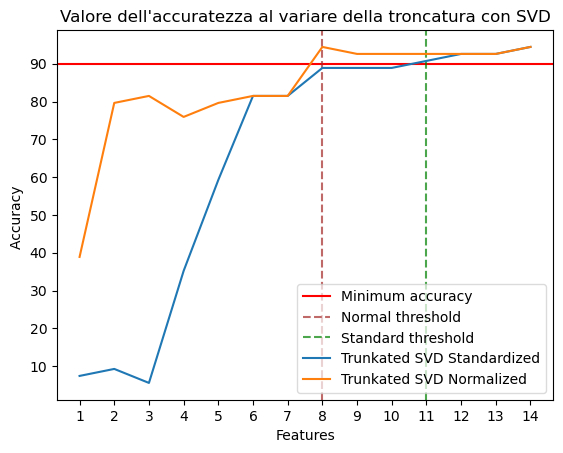

In [23]:
import matplotlib.pyplot as plt

plt.title("Valore dell'accuratezza al variare della troncatura con SVD")
plt.xlabel("Features")
plt.ylabel("Accuracy ")
plt.xticks(range(1, features+2))
plt.yticks(range(10, 100, 10))
plt.axhline(y=90, color='r', label="Minimum accuracy")
plt.axvline(8, linestyle="dashed", color='brown', alpha=0.7, label="Normal threshold")
plt.axvline(11, linestyle="dashed", color='green', alpha=0.7, label="Standard threshold")
plt.plot(range(1, features+2), acc_tsvd_std, label="Trunkated SVD Standardized")
plt.plot(range(1, features+2), acc_tsvd_mm, label="Trunkated SVD Normalized")
plt.legend(fancybox=True, framealpha=0.7)

Vediamo come che per k = 11 otteniamo un buon risultato sopra il 90% di accuratezza sul dataset standardizzato, mentre per il dataset normalizzato otteniamo questo risultato per k = 8.

### Matrice standardizzata

In [24]:
U, S, V, x = lsqr_tsvd(A_std_train, b_std_train, 11)
b_pred = A_std_test @ x

print(f"MSE:\t\t {mean_squared_error(b_std_test, b_pred): 2.3f}")

cond = S[0] / S[11]
cond_list_std.append(cond)
print(f"Condition:\t {cond: 2.3f}")

acc = accuracy_score(b_std_test, np.round(b_pred)) * 100
acc_list_std.append(acc)
print(f"Accuracy:\t {acc: 2.2f}%")

time = time_evaluation(lambda : lsqr_tsvd(A_std_train, b_std_train, 11), N_ITER)
time_list_std.append(time)
print(f"Average Time:\t {time: 2.2f} ms")

MSE:		  0.069
Condition:	  4.587
Accuracy:	  90.74%
Average Time:	  3.46 ms


### Matrice normalizzata

In [25]:
U, S, V, x = lsqr_tsvd(A_mm_train, b_mm_train, 8)
b_pred = A_mm_test @ x

print(f"MSE:\t\t {mean_squared_error(b_mm_test, b_pred): 2.3f}")

cond = S[0] / S[8]
cond_list_mm.append(cond)
print(f"Condition:\t {cond: 2.3f}")

acc = accuracy_score(b_mm_test, np.round(b_pred)) * 100
acc_list_mm.append(acc)
print(f"Accuracy:\t {acc: 2.2f}%")

time = time_evaluation(lambda : lsqr_tsvd(A_mm_train, b_mm_train, 11), N_ITER)
time_list_mm.append(time)
print(f"Average Time:\t {time: 2.2f} ms")

MSE:		  0.076
Condition:	  16.126
Accuracy:	  94.44%
Average Time:	  3.24 ms


## Soluzione dei minimi quadrati con funzione implementata SciPy

Come ultimo modello utilizziamo direttamente la funzione implementata all'interno di SciPy per risolvere il problema dei minimi quadrati. Facendo così abbiamo un metro di paragone per poter valutare i modelli implementati.

In [26]:
def lsqr(A, b):
    x, res, rank, s = las.lstsq(A, b)
    return x

### Matrice standardizzata

In [27]:
x = lsqr(A_std_train, b_std_train)
b_pred = A_std_test @ x

print(f"MSE:\t\t {mean_squared_error(b_std_test, b_pred): 2.3f}")

cond = np.linalg.cond(A_std_train)
cond_list_std.append(cond)
print(f"Condition:\t {cond: 2.3f}")

acc = accuracy_score(b_std_test, np.round(b_pred)) * 100
acc_list_std.append(acc)
print(f"Accuracy:\t {acc: 2.2f}%")

time = time_evaluation(lambda : lsqr(A_std_train, b_std_train), N_ITER)
time_list_std.append(time)
print(f"Average Time:\t {time: 2.2f} ms")

MSE:		  0.060
Condition:	  6.932
Accuracy:	  94.44%
Average Time:	  3.51 ms


### Matrice normalizzata

In [28]:
x = lsqr(A_mm_train, b_mm_train)
b_pred = A_mm_test @ x

print(f"MSE:\t\t {mean_squared_error(b_mm_test, b_pred): 2.3f}")

cond = np.linalg.cond(A_mm_train)
cond_list_mm.append(cond)
print(f"Condition:\t {cond: 2.3f}")

acc = accuracy_score(b_mm_test, np.round(b_pred)) * 100
acc_list_mm.append(acc)
print(f"Accuracy:\t {acc: 2.2f}%")

time = time_evaluation(lambda : lsqr(A_mm_train, b_mm_train), N_ITER)
time_list_mm.append(time)
print(f"Average Time:\t {time: 2.2f} ms")

MSE:		  0.060
Condition:	  28.154
Accuracy:	  94.44%
Average Time:	  2.76 ms


# Valutazione degli algoritmi

Dopo aver eseguito tutti gli algoritmi sia sui dati standardizzati che su quelli normalizzati procediamo a mostrare dei grafici dei risultati ottenuti.

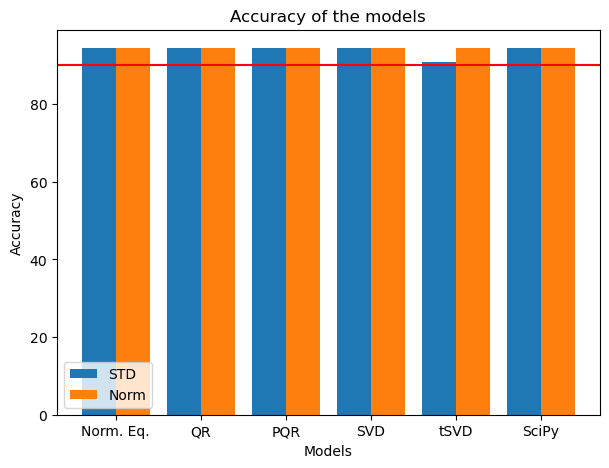

In [29]:
fig = plt.figure(figsize = (7, 5))

X_axis = np.arange(len(model_names))
plt.bar(X_axis - 0.2, acc_list_std, width = 0.4, label="STD")
plt.bar(X_axis + 0.2, acc_list_mm, width = 0.4, label="Norm")
plt.xticks(X_axis, model_names)

plt.axhline(y=90, color='r')

plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Accuracy of the models")
plt.legend()
plt.show()

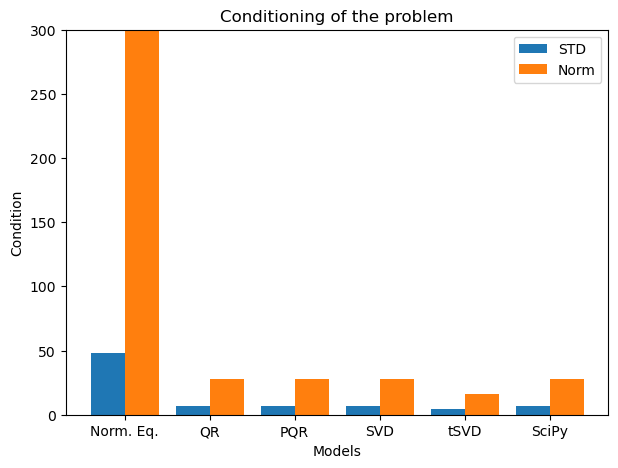

In [30]:
fig = plt.figure(figsize = (7, 5))

X_axis = np.arange(len(model_names))
plt.bar(X_axis - 0.2, cond_list_std, width = 0.4, label="STD")
plt.bar(X_axis + 0.2, cond_list_mm, width = 0.4, label="Norm")
plt.xticks(X_axis, model_names)
plt.ylim(0, 300)
plt.xlabel("Models")
plt.ylabel("Condition")
plt.title("Conditioning of the problem")
plt.legend()
plt.show()

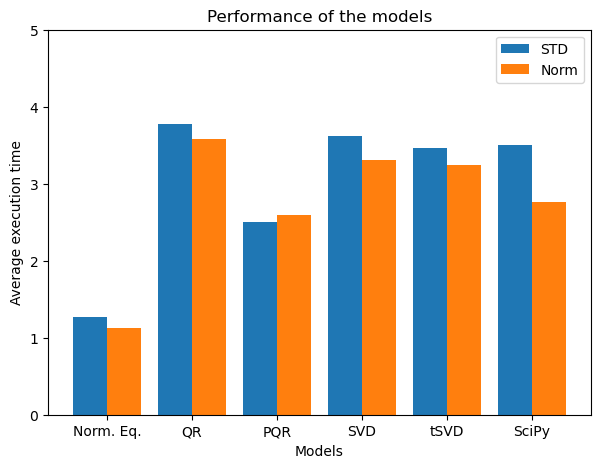

In [31]:
fig = plt.figure(figsize = (7, 5))

X_axis = np.arange(len(model_names))
plt.bar(X_axis - 0.2, time_list_std, width = 0.4, label="STD")
plt.bar(X_axis + 0.2, time_list_mm, width = 0.4, label="Norm")
plt.xticks(X_axis, model_names)
plt.ylim(0, 5)
plt.xlabel("Models")
plt.ylabel("Average execution time")
plt.title("Performance of the models")
plt.legend()
plt.show()